<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/22_Python_Feature_engineering_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_pandas_%D0%B8_numpy_%D0%B4%D0%BB%D1%8F_%D0%BE%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

data = pd.read_csv(load_boston()['filename'], skiprows=1)

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

CRIM - уровень преступности на душу населения по городам

ZN - доля жилой земли, зонированной для участков более 25 000 кв футов

INDUS - доля не-розничных бизнес-акров на город

CHAS - Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)

NOX - концентрация оксидов азота NOX (частей на 10 миллионов)

RM - среднее количество комнат на жилое помещение

AGE - ВОЗРАСТНАЯ доля занимаемых владельцами квартир, построенных до 1940 года

DIS - взвешивает расстояния до пяти бостонских центров занятости

RAD - индекс доступности радиальных магистралей

TAX - Налоговая ставка на имущество на 10 000

PLRATIO - Соотношение учеников и учителей PTRATIO по городам

B - доля чернокожих по городам.
LSTAT - % ниже статуса населения

MEDV - Медианная стоимость домов, занимаемых владельцами, в $ 1000



In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Итак, разделим датафрейм на две части, первая часть все показатели без таргета которая часть только показатель MEDV, который мы будем предсказывать. Обучим модель и посмотрим ошибку на не подготовленных данных.

In [0]:
data_reg = data.drop(['MEDV'], axis=1)

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

X = data_reg
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Bias: 36.45948838509004
Error: 3.2708628109003177


Все дальнейшие действия будут напралены на очистку и подготовку данных для обучения модели и сравнения ошибок.

In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
print(len(data))
print(data.shape)

506
(506, 14)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


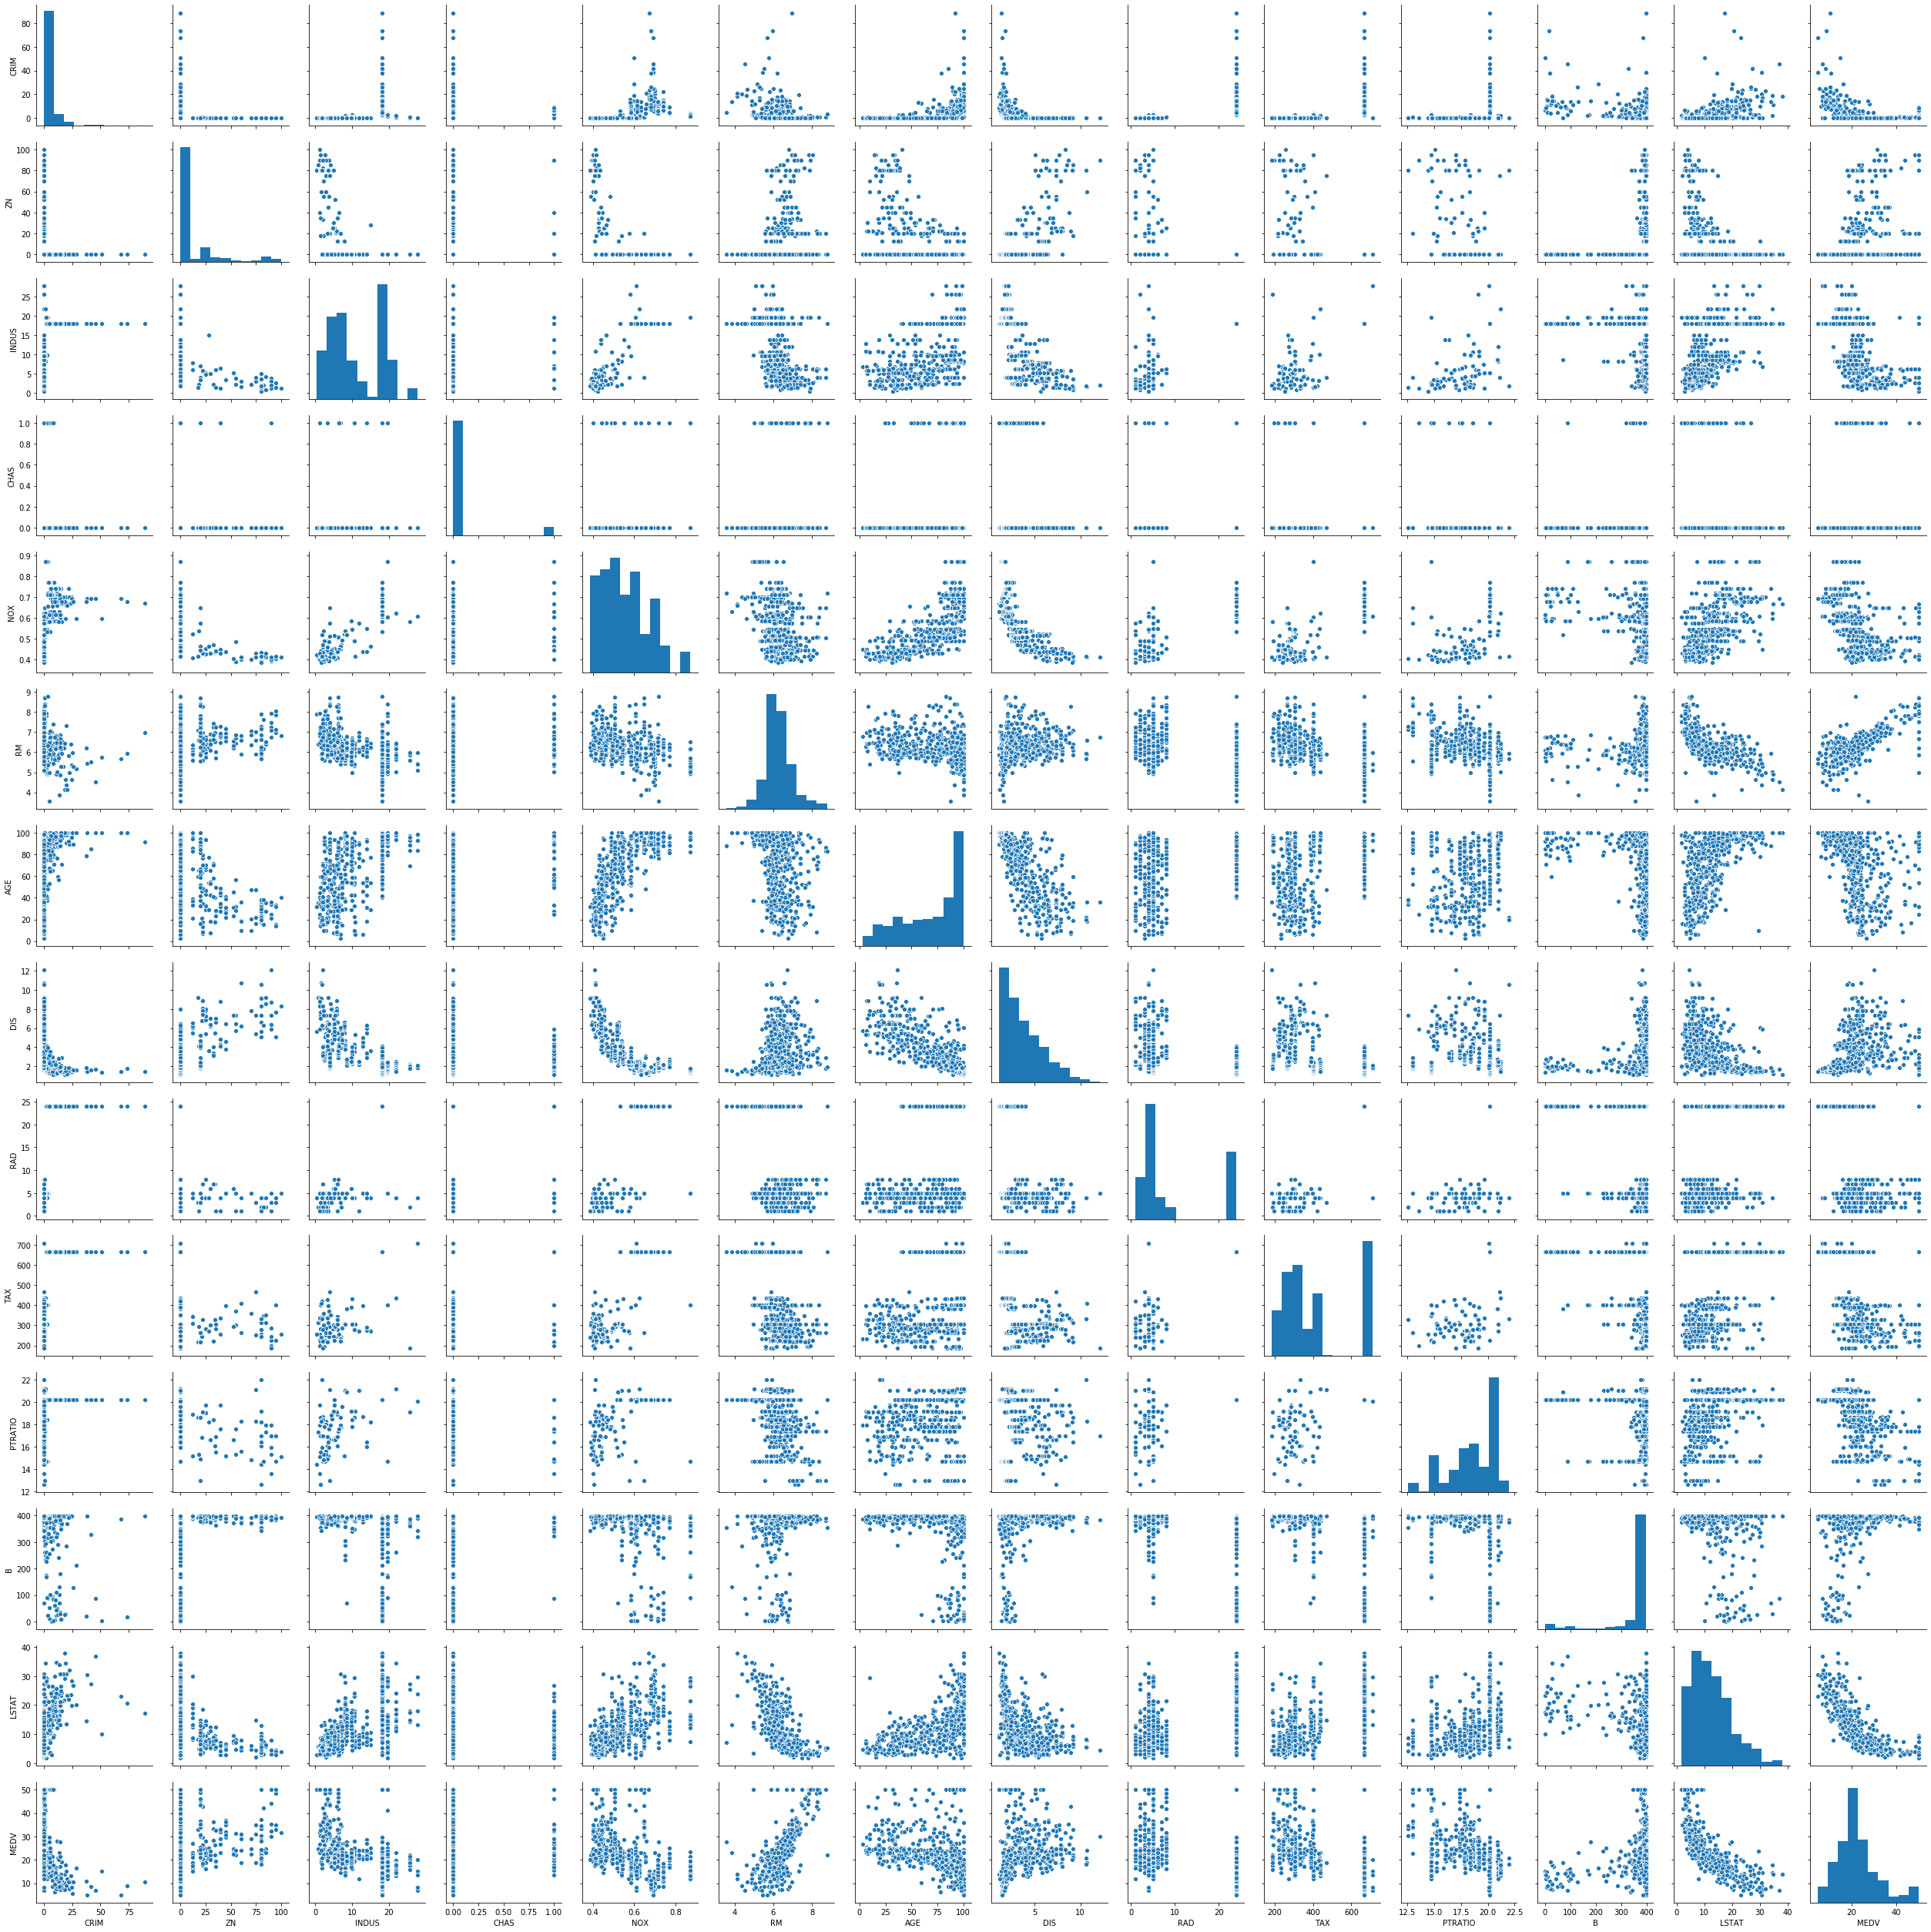

In [40]:
sns.pairplot(data)

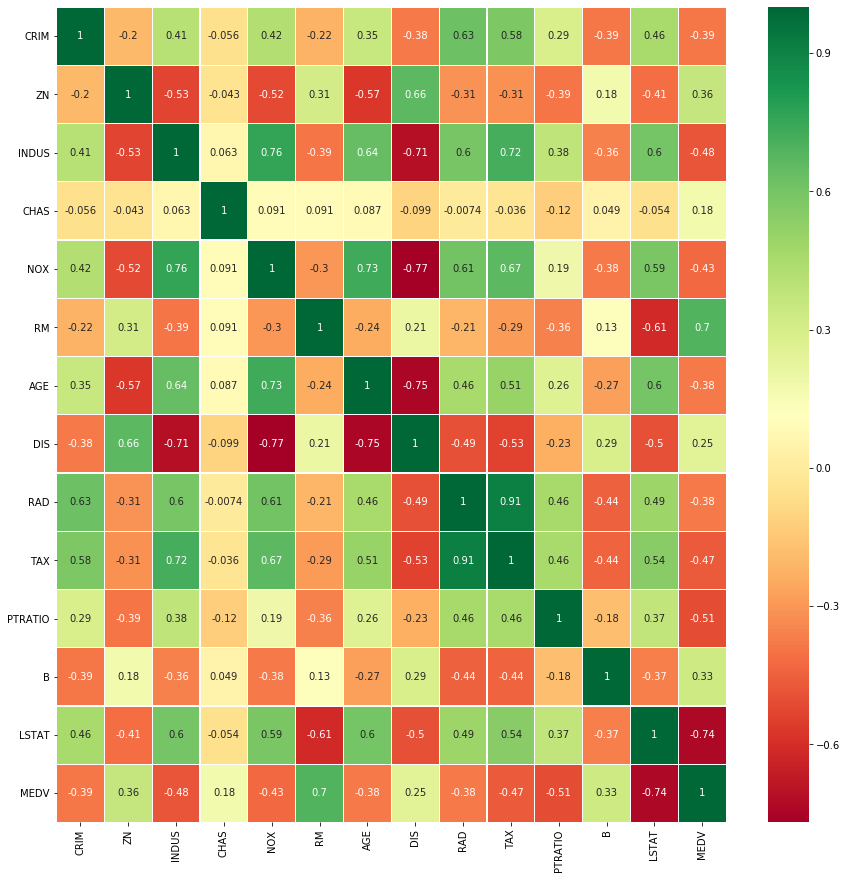

In [43]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
plt.show()

Судя по матрице корреляций существует сильная корреляция между RM и таргетом, попробуем посчитать ошибку модели на одном этом показателе. Мы видим, что ошибка стала выше, поэтому будем работать с данными дальше.

In [0]:
data_rm = data['RM']

In [0]:
data_rm = data_rm.apply(math.ceil).astype(int)

In [0]:
data_rm = np.array(data_rm).reshape(-1, 1)

In [14]:
X = data_rm
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [7.3364289]
Bias: -27.169324650017952
Error: 5.205699312470649


Выпишем столбцы, которые можно убрать из анализа

'CRIM' - ok - аномалий и выбросов не замечено

'ZN' - delete - аномалий и выбросов не замечено

'INDUS' - mb - аномалий и выбросов не замечено

'CHAS' - delete - аномалий и выбросов не замечено

'NOX' - mb - аномалий и выбросов не замечено 

'RM' - ok - нужно округлить в большую сторону

'AGE' - delete

'DIS' - mb -  аномалий и выбросов не замечено

'RAD' - mb

'TAX' - ok

'PTRATIO' - delete

'B' - ok

'LSTAT' - ок - обратная полиномиальная регрессия

'MEDV'



Анализируем распределения и анномалии по каждому параметру

In [0]:
data_reg['RM'] = data_reg['RM'].apply(math.ceil).astype(int)

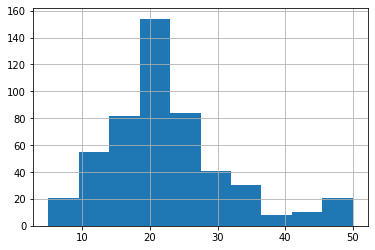

In [16]:
data['MEDV'].hist()

Итак, проанализировав данные напрашивается несколько вопросов, во первых странные данные по ценам ниже 10, уровень ТАХ = 666, уровень темнокожих ниже 10, а также показатель RAD = 24. Попробую два подхода: 1 - удалить эти строки, 2 - заменить на среднее.

Для начала сократим количество показателей, построим модель после удаления нескольких
столбцов, а затем нормализуем эти данные, построим модель и сравним результаты.

In [17]:
data_approach_1 = data_reg.drop(['AGE', 'PTRATIO', 'ZN', 'CHAS'], axis=1)
data_approach_1.head()

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,B,LSTAT
0,0.00632,2.31,0.538,7,4.0900,1,296,396.90,4.98
1,0.02731,7.07,0.469,7,4.9671,2,242,396.90,9.14
2,0.02729,7.07,0.469,8,4.9671,2,242,392.83,4.03
3,0.03237,2.18,0.458,7,6.0622,3,222,394.63,2.94
4,0.06905,2.18,0.458,8,6.0622,3,222,396.90,5.33


In [0]:
headers = list(data_approach_1.columns.values)

In [19]:
scaler = preprocessing.StandardScaler()
data_approach_2 = scaler.fit_transform(data_approach_1)
df_norm_1 = pd.DataFrame(data_approach_2)
df_norm_1.columns = headers
df_norm_1.head()

,CRIM,INDUS,NOX,RM,DIS,RAD,TAX,B,LSTAT
0,-0.419782,-1.287909,-0.144217,0.288623,0.140214,-0.982843,-0.666608,0.441052,-1.075562
1,-0.417339,-0.593381,-0.740262,0.288623,0.557160,-0.867883,-0.987329,0.441052,-0.492439
2,-0.417342,-0.593381,-0.740262,1.569706,0.557160,-0.867883,-0.987329,0.396427,-1.208727
3,-0.416750,-1.306878,-0.835284,0.288623,1.077737,-0.752922,-1.106115,0.416163,-1.361517
4,-0.412482,-1.306878,-0.835284,1.569706,1.077737,-0.752922,-1.106115,0.441052,-1.026501


In [0]:
df_norm_1.columns

Поработаем со странными значениями ТАХ = 666, уровень темнокожих ниже 10, а также показатель RAD = 24

In [0]:
data_reg_1 = data[data['TAX'] !=666]

In [0]:
data_reg_1_target = data_reg_1['MEDV']

In [0]:
data_reg_1 = data_reg_1.drop(['MEDV'], axis=1)
data_reg_1.head()

In [0]:
data_reg_1[data_reg_1['MEDV'] == 50]

In [0]:
len(data_reg_1_target)

In [0]:
tax666 = data[data['TAX'] == 666]

In [0]:
sns.pairplot(tax666)

In [0]:
data_wth_666 = data[data['TAX'] != 666]

In [0]:
data_wth_666 = data_wth_666[data_wth_666['MEDV'] != 50]

In [0]:
data_wth_666.hist(figsize=(15,15))
plt.show()

In [0]:
sns.pairplot(data_wth_666)

In [0]:
data_wth_666.describe()

In [0]:
data.describe()

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x=data_wth_666['RM'], y=data_wth_666['MEDV'])
plt.show()

Попробуем полиномиальную регрессию на показателе LSTAT

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train_lstat)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)

**Результаты моделей**

1.  На всех данных, без обработки
*  R2: 	 0.6197381783666025
*   RMSE: 	 4.918517322266345
*   MAE: 	 3.5835665363854448
2.  На одном показателе RM
*   R2: 	 0.504181351276971
*   RMSE: 	 5.6163513893118395
* MAE: 	 4.044859175712278
3. На одном показателе RM, после округления в бОльшую сторону
*   R2: 	 0.3851370305838009
* RMSE: 	 6.2543475658102015
* MAE: 	 4.733766124544446
4. На показателях 'CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'
* R2: 	 0.6613075829998756
* RMSE: 	 4.641897856718249
* MAE: 	 3.4572858241822906
5. На показателях 'CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT' после нормализаци MixMaxScaller
* R2: 	 0.6613075829998756
* RMSE: 	 4.641897856718249
* MAE: 	 3.4572858241822906
6. На показателях 'CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT' после нормализаци StandartScaller
* R2: 	 0.661307582999878
* RMSE: 	 4.6418978567182325
* MAE: 	 3.4572858241822724
7. После удаления строк со значением TAX = 666
* R2: 	 0.8494399850402503
* RMSE: 	 3.4873120913550344
* MAE: 	 2.7893019732589526
8. После удаления строк со значением TAX = 666, на одном показателе RM
* R2: 	 0.7305161670460163
* RMSE: 	 3.846147689313335
* MAE: 	 3.0537879697836248
9. Полиномиальная регрессия на показателе LSTAT, а также TAX != 666
* R2: 	 0.46121759657776096
* RMSE: 	 5.4383393081105
* MAE: 	 4.225968690134918
 	 










In [0]:
X = data_wth_666
y = data_wth_666['MEDV']

In [0]:
X = np.array(data_wth_666['LSTAT']).reshape(-1, 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [0]:
# Попробуем полиномиальную регрессию по показателю LSTAT и TAX != 666
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X_train)

estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

# pol_reg.score(poly_reg.fit_transform(X_test_lstat), y_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

In [0]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

In [25]:
for a, b in zip(y, y_pred):
  print('True: {}, Pred: {}, Diff: {}'.format(a*1000, b*1000, a*1000-b*1000))

True: 24000.0, Pred: 34036.61343601247, Diff: -10036.61343601247
True: 21600.0, Pred: 42482.64372597389, Diff: -20882.64372597389
True: 34700.0, Pred: 10079.63443744265, Diff: 24620.365562557352
True: 33400.0, Pred: 25675.574645824243, Diff: 7724.425354175757
True: 36200.0, Pred: 16294.637858357653, Diff: 19905.36214164235
True: 28700.0, Pred: 22116.555592821627, Diff: 6583.444407178373
True: 22900.0, Pred: 14159.22642655608, Diff: 8740.77357344392
True: 27100.0, Pred: 34929.02418363103, Diff: -7829.024183631031
True: 16500.0, Pred: 21787.213531200494, Diff: -5287.213531200494
True: 18900.0, Pred: 31104.406693837176, Diff: -12204.406693837176
True: 15000.0, Pred: 26366.13058148147, Diff: -11366.13058148147
True: 18900.0, Pred: 21797.837468672158, Diff: -2897.837468672158
True: 21700.0, Pred: 21510.991156937605, Diff: 189.0088430623946
True: 20400.0, Pred: 25611.831020994345, Diff: -5211.831020994345
True: 18200.0, Pred: 35502.71680710013, Diff: -17302.71680710013
True: 19900.0, Pred: 2